In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
mydog = cv2.imread('14.jpg')
mydog.shape

(387, 500, 3)

In [ ]:
mydog

array([[[ 98,  95,  90],
        [ 96,  93,  88],
        [ 94,  91,  86],
        ...,
        [150, 146, 145],
        [141, 137, 136],
        [138, 134, 133]],

       [[ 91,  88,  83],
        [ 95,  92,  87],
        [ 93,  90,  85],
        ...,
        [152, 148, 147],
        [144, 140, 139],
        [140, 136, 135]],

       [[ 81,  78,  73],
        [ 90,  87,  82],
        [ 94,  91,  86],
        ...,
        [146, 142, 141],
        [139, 135, 134],
        [132, 128, 127]],

       ...,

       [[144, 143, 145],
        [136, 135, 137],
        [122, 121, 123],
        ...,
        [146, 147, 145],
        [130, 131, 129],
        [134, 135, 133]],

       [[154, 153, 157],
        [148, 147, 151],
        [125, 124, 126],
        ...,
        [136, 137, 135],
        [133, 134, 132],
        [133, 134, 132]],

       [[148, 147, 151],
        [146, 145, 149],
        [127, 126, 128],
        ...,
        [151, 152, 150],
        [162, 163, 161],
        [155, 156, 154]]

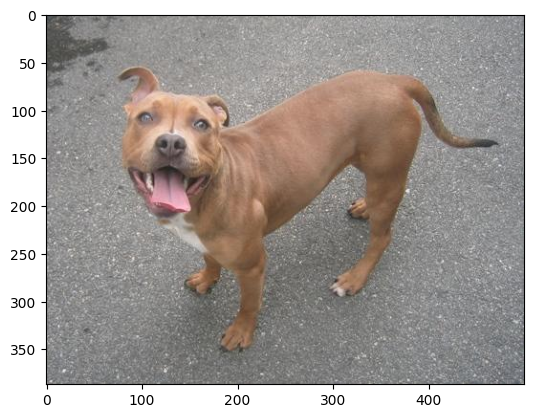

In [ ]:
plt.imshow(cv2.cvtColor(mydog, cv2.COLOR_BGR2RGB))
plt.show()

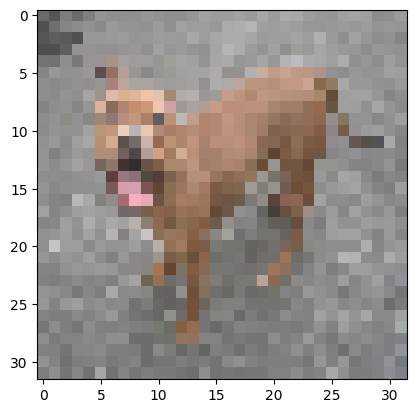

In [ ]:
mydog_resized = cv2.resize(mydog, dsize=(32, 32))
plt.imshow(cv2.cvtColor(mydog_resized, cv2.COLOR_BGR2RGB))
plt.show()

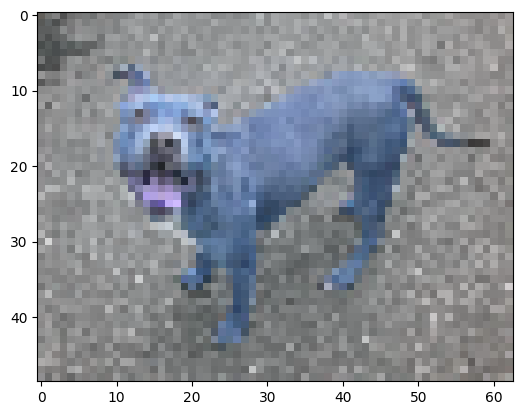

In [ ]:
plt.imshow(mydog[::8, ::8])
plt.show()

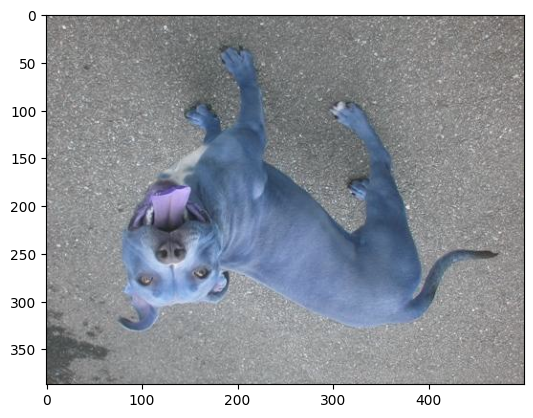

In [ ]:
plt.imshow(mydog[::-1, ::])
plt.show()

In [ ]:
###########################################

In [ ]:
!kaggle competitions download -c dogs-vs-cats

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle competitions download -c dogs-vs-cats

 98% 793M/812M [00:05<00:00, 103MB/s] 
100% 812M/812M [00:05<00:00, 149MB/s]


In [ ]:
!unzip -qq dogs-vs-cats.zip

In [ ]:
!unzip -qq train.zip

In [ ]:
!ls

14.jpg		  kaggle.json  sampleSubmission.csv  train
dogs-vs-cats.zip  sample_data  test1.zip	     train.zip


In [ ]:
import os,shutil,pathlib
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
  for category in ("cat", "dog"):
    dir = new_base_dir / subset_name / category
    os.makedirs(dir)
    f_names = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
    for f_name in f_names:
      shutil.copyfile(src=original_dir / f_name, dst=dir / f_name)

In [ ]:
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2000)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                        

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [ ]:
# Preprocessing
# 1. Read the image
# 2. Decode from jpg to rgb-grid
# 3. Convert to float
# 4. Resize the matrix
# 5. Pack for batching (useful for admin ram)

from tensorflow.keras.utils import image_dataset_from_directory

In [ ]:
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size = (180, 180),
    batch_size = 32
)

validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size = (180, 180),
    batch_size = 32
)

test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size = (180, 180),
    batch_size = 32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_dataset:
  print(f"Data batch shape: {data_batch.shape}")
  print(f"Labels batch shape: {labels_batch.shape}")
  break

Data batch shape: (32, 180, 180, 3)
Labels batch shape: (32,)


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.x",
        save_best_only=True,
        monitor="val_loss"
    )
]

In [ ]:
history = model.fit(train_dataset, epochs=30, validation_data=validation_dataset, callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 255s 4s/step - loss: 0.6916 - accuracy: 0.5325 - val_loss: 0.6826 - val_accuracy: 0.5230
Epoch 2/30
63/63 [==============================] - 211s 3s/step - loss: 0.6825 - accuracy: 0.5610 - val_loss: 0.6767 - val_accuracy: 0.5230
Epoch 3/30
63/63 [==============================] - 220s 4s/step - loss: 0.6504 - accuracy: 0.6315 - val_loss: 0.6244 - val_accuracy: 0.6640
Epoch 4/30
63/63 [==============================] - 213s 3s/step - loss: 0.6075 - accuracy: 0.6710 - val_loss: 0.6342 - val_accuracy: 0.6460
Epoch 5/30
63/63 [==============================] - 211s 3s/step - loss: 0.5759 - accuracy: 0.6930 - val_loss: 0.6344 - val_accuracy: 0.6470
Epoch 6/30
63/63 [==============================] - 220s 4s/step - loss: 0.5575 - accuracy: 0.7100 - val_loss: 0.6229 - val_accuracy: 0.6360
Epoch 7/30
63/63 [==============================] - 213s 3s/step - loss: 0.5179 - accuracy: 0.7505 - val_loss: 0.5501 - val_accuracy: 0.7170
Epoch 8/30
63

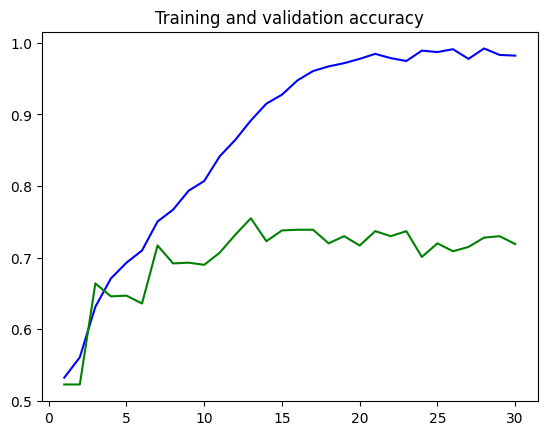

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, 31)
plt.plot(epochs, accuracy, "b", label="Training Accuracy")
plt.plot(epochs, val_accuracy, "g", label="Validation Accuracy")
plt.title(label="Training and validation accuracy")
plt.show()